In [46]:
import pandas as pd

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/FSDSRegression/main/notebooks/data/gemstone.csv')

In [48]:
# for missing value checking
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

##No missing values present in data

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [50]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [51]:
#drop id column 
df = df.drop(labels = ['id'],axis=1)

In [52]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [53]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [54]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [55]:
#check for duplicates

df.duplicated().sum()

0

In [56]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of         carat        cut color clarity  depth  table     x     y     z  price
0        1.52    Premium     F     VS2   62.2   58.0  7.27  7.33  4.55  13619
1        2.03  Very Good     J     SI2   62.0   58.0  8.06  8.12  5.05  13387
2        0.70      Ideal     G     VS1   61.2   57.0  5.69  5.73  3.50   2772
3        0.32      Ideal     G     VS1   61.6   56.0  4.38  4.41  2.71    666
4        1.70    Premium     G     VS2   62.6   59.0  7.65  7.61  4.77  14453
...       ...        ...   ...     ...    ...    ...   ...   ...   ...    ...
193568   0.31      Ideal     D    VVS2   61.1   56.0  4.35  4.39  2.67   1130
193569   0.70    Premium     G    VVS2   60.3   58.0  5.75  5.77  3.47   2874
193570   0.73  Very Good     F     SI1   63.1   57.0  5.72  5.75  3.62   3036
193571   0.34  Very Good     D     SI1   62.9   55.0  4.45  4.49  2.81    681
193572   0.71       Good     E     SI2   60.8   64.0  5.73  5.71  3.48   2258

[193573 rows x 10 co

In [57]:
#segregate numerical and categorical columns
numerical_columns = df.columns[df.dtypes!='object']
categorical_columns = df.columns[df.dtypes=='object']
print("numerical_columns: " ,numerical_columns)
print('categorical columns: ',categorical_columns)

numerical_columns:  Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
categorical columns:  Index(['cut', 'color', 'clarity'], dtype='object')


In [58]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [59]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [60]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [61]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

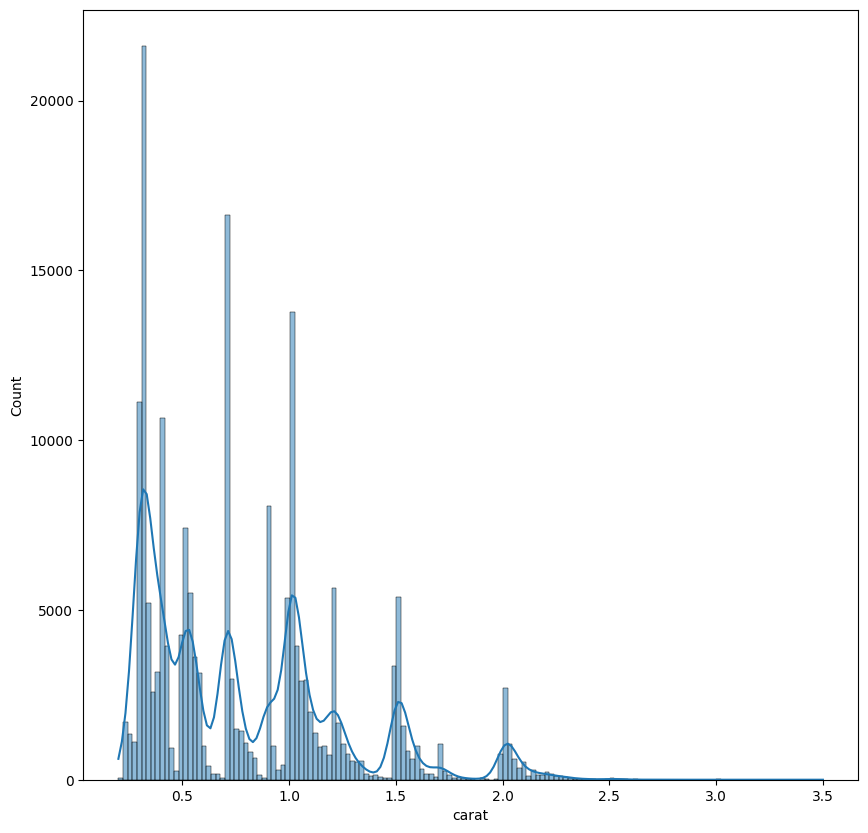

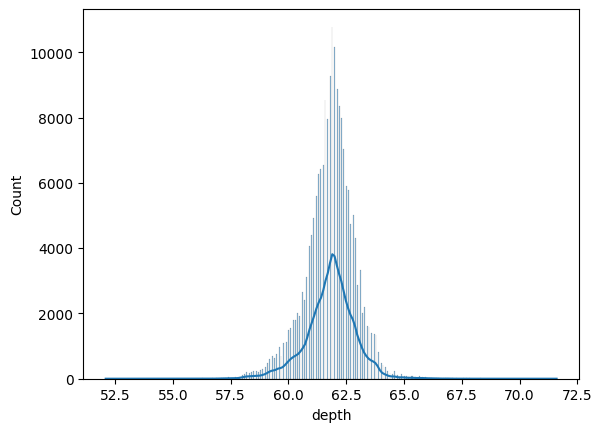

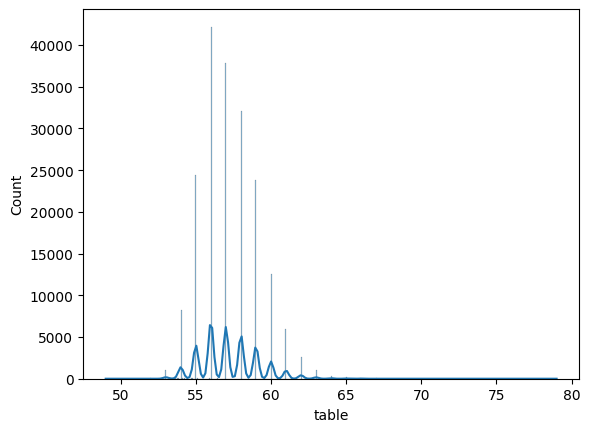

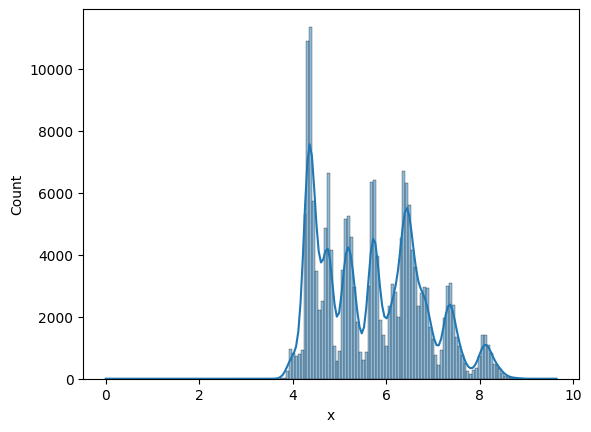

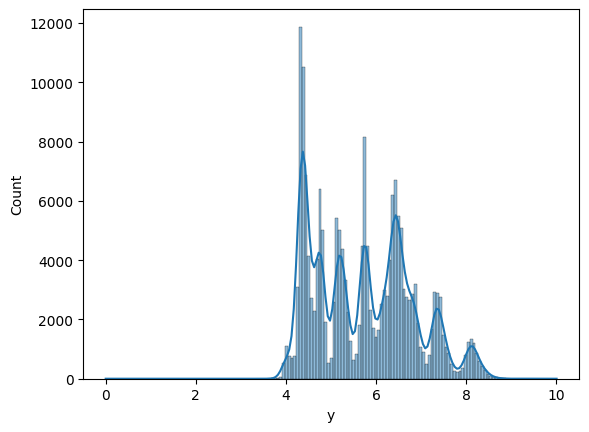

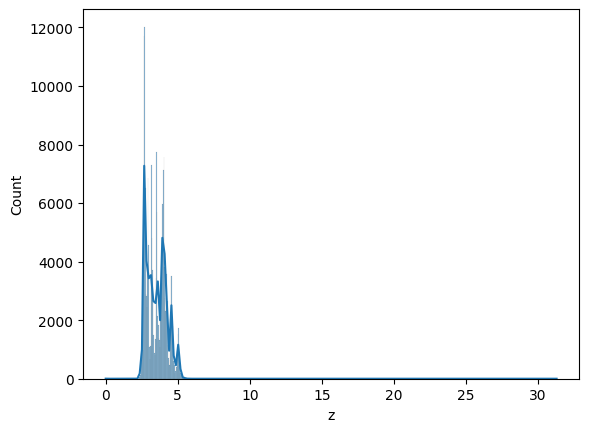

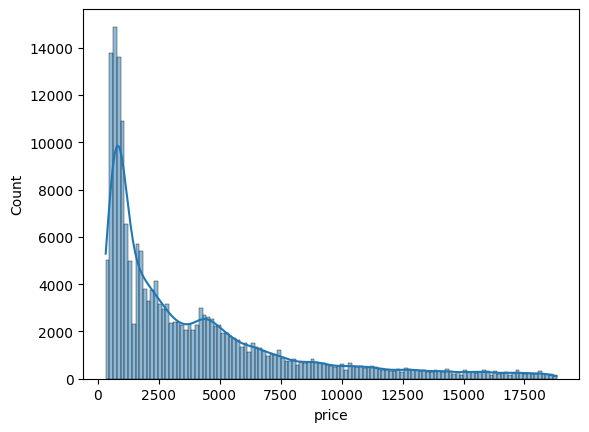

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10)) # check for subplots
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

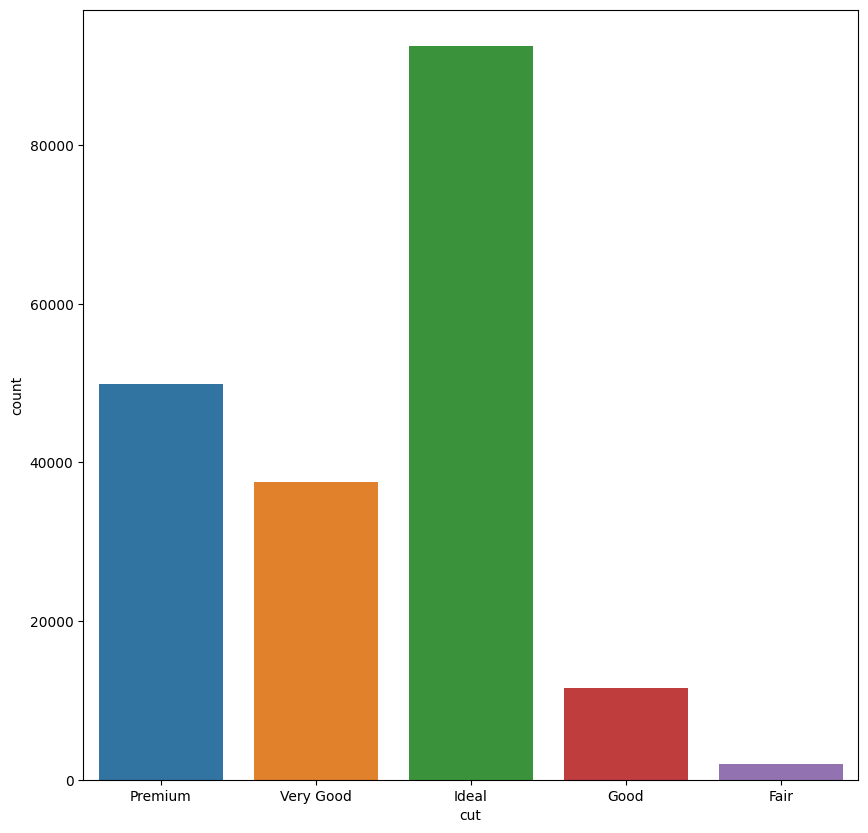

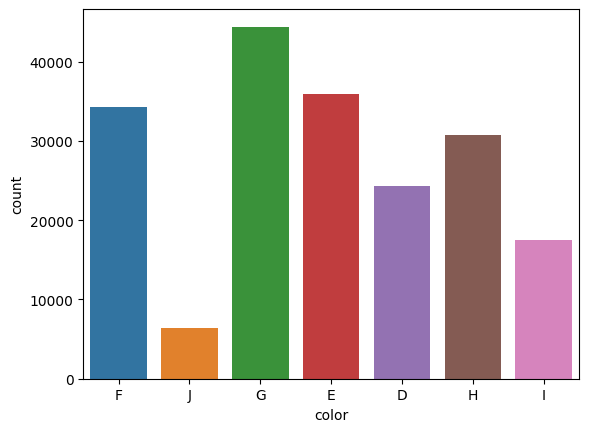

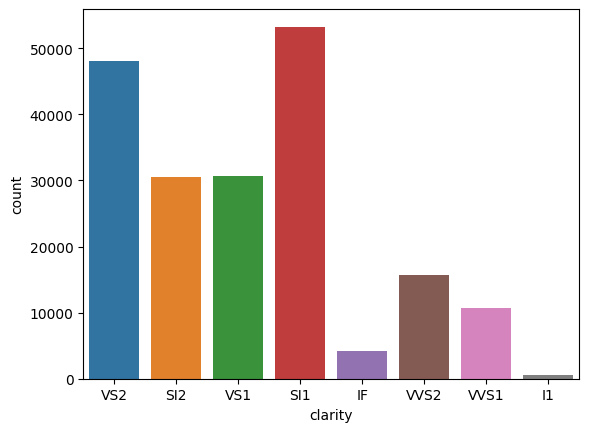

In [63]:
# for categorical data

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10)) # check for subplots
x=0
for i in categorical_columns:
    sns.countplot(data=df,x = i)
    print('\n')
    plt.show()

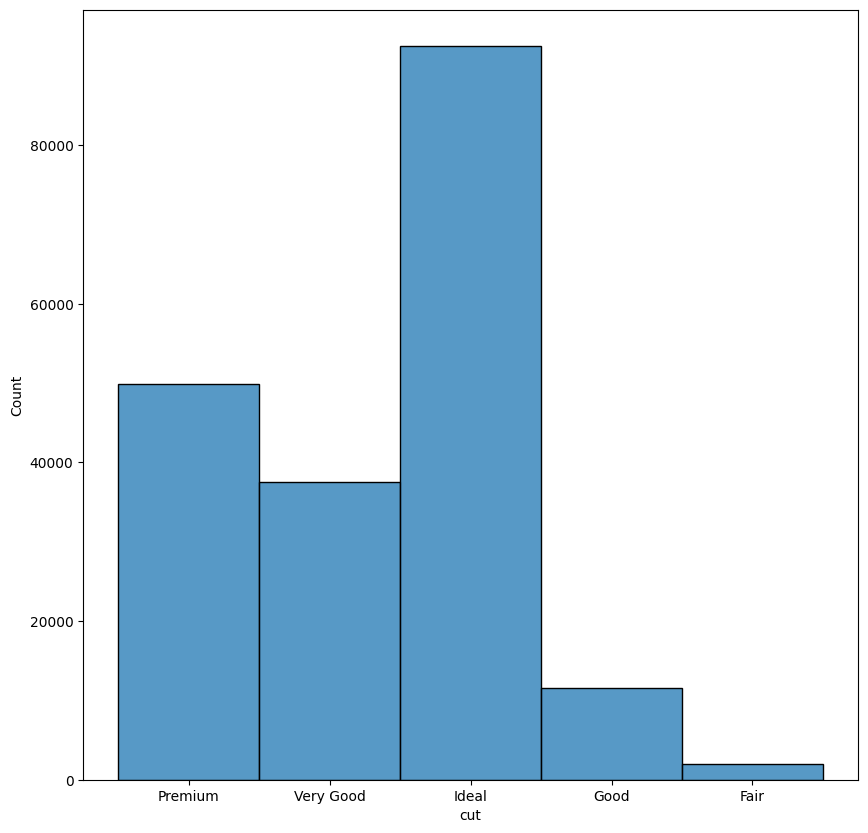

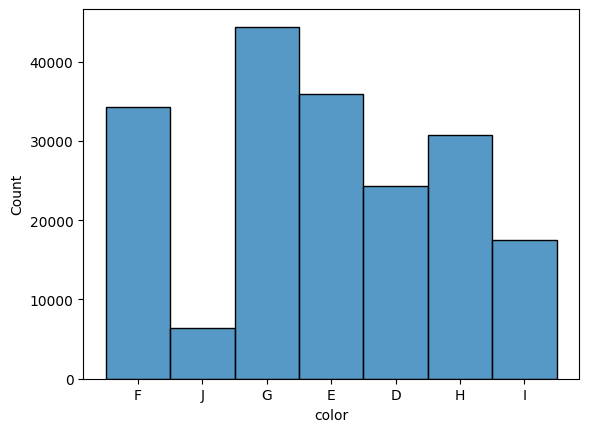

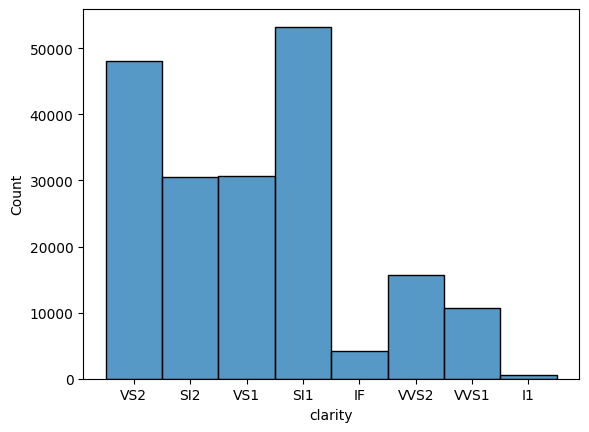

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10)) # check for subplots
x=0
for i in categorical_columns:
    sns.histplot(data=df,x=i)
    print('\n')
    plt.show()

<Axes: >

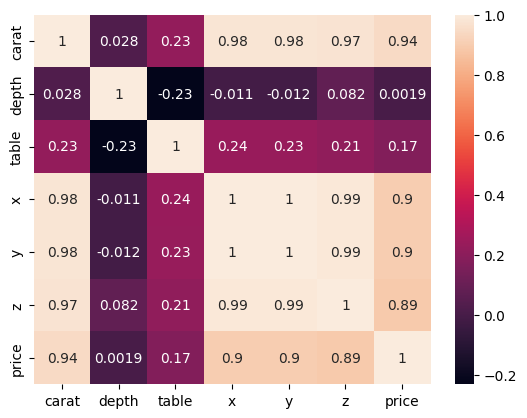

In [65]:
sns.heatmap(df[numerical_columns].corr(),annot=True)

#Multi colinearity of carat with respect to x,y,z (linear regression condition to drop multicolinearity columns)

<Axes: xlabel='carat', ylabel='price'>

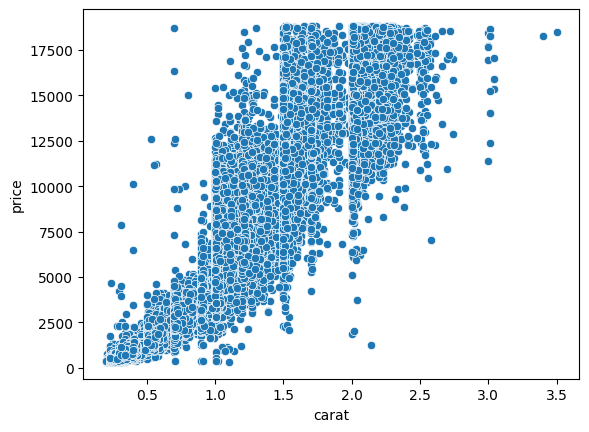

In [66]:
sns.scatterplot(df,x= 'carat',y = 'price')

In [67]:
# we will do it after a while to observe overfitting
#df.drop(labels=['x','y','z'],axis=1)

In [68]:
sns.pairplot(df)

Error in callback <function flush_figures at 0x7fac7bf51ca0> (for post_execute):


KeyboardInterrupt: 

In [69]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [70]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [71]:
cut_map = {'Premium':4, 'Very Good':3, 'Ideal':5, 'Good':2, 'Fair':1}

In [72]:
categorical_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [73]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [74]:
clarity_map = {'VS2':4, 'SI2':2, 'VS1':5, 'SI1':3, 'IF':8, 'VVS2':6, 'VVS1':7, 'I1':1}

In [75]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [76]:
color_map = {'F':3, 'J':7, 'G':4, 'E':2, 'D':1, 'H':5, 'I':6}

In [77]:
df['cut'] = df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [79]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
